In [1]:
import utils
import keras
import model01
import datasets
import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [10]:
def plot_learning_curve(pc, model_desc, ylims):
    fig = plt.figure()
    plt.plot(pc.train_losses[:], label='training set')
    plt.plot(pc.validation_losses[:], label='validation set')
    ax= fig.axes[0]
    ax.set_ylim(ylims[0], ylims[1])
    ax.set_xlabel('epoch')
    ax.set_ylabel('binary cross-entropy loss')
    plt.title('training curve - ' + model_desc)
    plt.legend()
    
def model_name_from_weights_file(wf):
    return "-".join(wf[9:-5].split('-')[:-2])


def report_performance(model_details, X_test, Y_test, prices_test, dataset_name, 
                       learning_curve=False, ylims=(0.68,0.70), **kwargs):
    
    name, weight_file = model_details
    title = name + " " + dataset_name  
    weight_file = './output/' + weight_file
    model = keras.models.load_model(weight_file)
    
    
    Y_test_pred = model.predict(X_test.as_matrix(), batch_size=1024)

    metrics_map = metrics.performance_report(title,  prices_test,  lookahead, Y_test, Y_test_pred, **kwargs)
    metrics_map['model'] = name
    if learning_curve:
        pc = model01.ProgressCallback.load(model_name_from_weights_file(weight_file))
        plot_learning_curve(pc, name, ylims)
        
    return model, metrics_map
    

In [25]:
!ls ./output/MLPModel01_20170423_2154_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_DO0.5-7*

./output/MLPModel01_20170423_2154_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_DO0.5-700-0.6914.hdf5
./output/MLPModel01_20170423_2154_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_DO0.5-705-0.6914.hdf5
./output/MLPModel01_20170423_2154_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_DO0.5-710-0.6914.hdf5
./output/MLPModel01_20170423_2154_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_DO0.5-715-0.6914.hdf5
./output/MLPModel01_20170423_2154_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_DO0.5-720-0.6914.hdf5
./output/MLPModel01_20170423_2154_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_DO0.5-725-0.6914.hdf5
./output/MLPModel01_20170423_2154_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_DO0.5-730-0.6914.hdf5
./output/MLPModel01_20170423_2154_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_DO0.5-735-0.6914.hdf5
./output/MLPModel01_20170423_2154_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_DO0.5-740-0.6914.hdf5
./output/MLPModel01_20170423_2154_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_DO0.5-745-0.6914.hdf5
./output/MLPModel01_20170423_2154_EURUSD

In [12]:
BEST_MODELS = [
    ['100 dropout=0', 'MLPModel01_20170423_1307_EURUSD_DS3_20092014_LA1_F99_C2_L100_DO0-1000-0.6945.hdf5'],
    ['100x100 dropout=0','MLPModel01_20170423_1448_EURUSD_DS3_20092014_LA1_F99_C2_L100_100_DO0-1000-0.6928.hdf5'],
    ['100x100 dropout=0.5','MLPModel01_20170425_1049_EURUSD_DS3_20092014_LA1_F99_C2_L100_100_DO0.5-1000-0.6919.hdf5'],
    ['500 dropout=0','MLPModel01_20170423_1615_EURUSD_DS3_20092014_LA1_F99_C2_L500_DO0-1000-0.6949.hdf5'],
    ['500x500 dropout=0 epoch 165', 'MLPModel01_20170423_1800_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_DO0-165-0.6954.hdf5'],
    ['500x500 dropout=0 epoch 1000', 'MLPModel01_20170423_1800_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_DO0-1000-0.7095.hdf5'],
    ['500x500 dropout=0.5','MLPModel01_20170423_2154_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_DO0.5-1000-0.6914.hdf5'],
    ['500x500 dropout=0.5 #2','MLPModel01_20170425_2130_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_DO0.5-1000-0.6910.hdf5'],
    ['100x100x100 dropout=0 epoch 20',  'MLPModel01_20170418_1912_EURUSD_DS3_20092014_LA1_F99_C2_L100_100_100_DO0-020-0.6932.hdf5'],
    ['100x100x100 dropout=0 epoch 115', 'MLPModel01_20170418_1912_EURUSD_DS3_20092014_LA1_F99_C2_L100_100_100_DO0-115-0.6934.hdf5'],
    ['100x100x100 dropout=0.5', 'MLPModel01_20170418_1151_EURUSD_DS3_20092014_LA1_F99_C2_L100_100_100_DO0.5-1005-0.6913.hdf5'],
    ['100x100x100 dropout=0.5 #2', 'MLPModel01_20170425_1447_EURUSD_DS3_20092014_LA1_F99_C2_L100_100_100_DO0.5-1000-0.6920.hdf5'],
    ['500x500x500 dropout=0',   'MLPModel01_20170423_1051_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_500_DO0-015-0.6941.hdf5'],
    ['500x500x500 dropout=0.5 epoch 1470', 'MLPModel01_20170424_0713_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_500_DO0.5-1470-0.6912.hdf5'],
    ['500x500x500 dropout=0.5 epoch 1970', 'MLPModel01_20170424_0713_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_500_DO0.5-1970-0.6912.hdf5'],
    ['500x500x500 dropout=0.5', 'MLPModel01_20170424_0713_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_500_DO0.5-2000-0.6913.hdf5'],
    ['32x32x32x32 dropout=0.5 epoch 455', 'MLPModel01_20170423_1239_EURUSD_DS3_20092014_LA1_F99_C2_L32_32_32_32_DO0.5-455-0.6931.hdf5'],
]

In [36]:
# load validation dataset
lookahead=1
dataset = 'DS3'
window=25
sym='EURUSD'

year=2015
test_title = sym + " " + str(year)
X_test, Y_test, prices_test = datasets.load(datasets.filename(dataset, lookahead, window, sym, year))

500x500 dropout=0.5 EURUSD 2015: f1-score: 0.526, mean future return: 0.030 bps, annualized future return 2.123


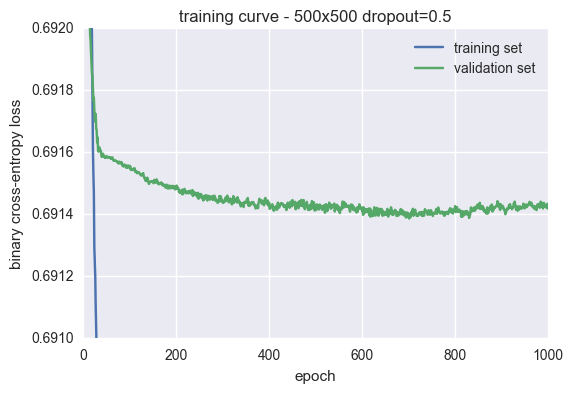

In [31]:
best = ['500x500 dropout=0.5','MLPModel01_20170423_2154_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_DO0.5-1000-0.6914.hdf5']
report_performance(best, X_test, Y_test, prices_test, test_title, ylims=(0.691,0.692), learning_curve=True);

In [14]:
summary = pd.DataFrame()
model_indices = range(len(BEST_MODELS))
for i in model_indices:
    print 
    model, m = report_performance(BEST_MODELS[i], X_test, Y_test, prices_test, test_title, learning_curve=False)
    summary = summary.append(pd.Series(m), ignore_index=True)

summary['f1_score'] = summary['f1_score'].map('{:,.3f}'.format)
summary['mean_fut_return'] = summary['mean_fut_return'].map('{:,.3f}'.format)
summary['ann_fut_return'] = summary['ann_fut_return'].map('{:,.3f}'.format)
summary[['model', 'f1_score', 'mean_fut_return', 'ann_fut_return']]


100 dropout=0 EURUSD 2015: f1-score: 0.516, mean future return: 0.021 bps, annualized future return 1.221

100x100 dropout=0 EURUSD 2015: f1-score: 0.520, mean future return: 0.023 bps, annualized future return 1.329

100x100 dropout=0.5 EURUSD 2015: f1-score: 0.520, mean future return: 0.029 bps, annualized future return 1.948

500 dropout=0 EURUSD 2015: f1-score: 0.518, mean future return: 0.021 bps, annualized future return 1.207

500x500 dropout=0 epoch 165 EURUSD 2015: f1-score: 0.518, mean future return: 0.023 bps, annualized future return 1.380

500x500 dropout=0 epoch 1000 EURUSD 2015: f1-score: 0.516, mean future return: 0.025 bps, annualized future return 1.574

500x500 dropout=0.5 EURUSD 2015: f1-score: 0.526, mean future return: 0.030 bps, annualized future return 2.123

500x500 dropout=0.5 #2 EURUSD 2015: f1-score: 0.525, mean future return: 0.030 bps, annualized future return 2.080

100x100x100 dropout=0 epoch 20 EURUSD 2015: f1-score: 0.519, mean future return: 0.024 bp

,model,f1_score,mean_fut_return,ann_fut_return
0,100 dropout=0,0.516,0.021,1.221
1,100x100 dropout=0,0.520,0.023,1.329
2,100x100 dropout=0.5,0.520,0.029,1.948
3,500 dropout=0,0.518,0.021,1.207
4,500x500 dropout=0 epoch 165,0.518,0.023,1.380
5,500x500 dropout=0 epoch 1000,0.516,0.025,1.574
6,500x500 dropout=0.5,0.526,0.030,2.123
7,500x500 dropout=0.5 #2,0.525,0.030,2.080
8,100x100x100 dropout=0 epoch 20,0.519,0.024,1.472
9,100x100x100 dropout=0 epoch 115,0.521,0.026,1.653


----------------

In [15]:
# load *training* set
lookahead=1
dataset = 'DS3'
window=25
sym='EURUSD'

year=20092014
train_title = sym + " " + str(year)
X_train, Y_train, prices_train = datasets.load(datasets.filename(dataset, lookahead, window, sym, year))

In [17]:
summary = pd.DataFrame()
model_indices = range(len(BEST_MODELS))
for i in model_indices:
    print 
    model, m = report_performance(BEST_MODELS[i], X_train, Y_train, prices_train, train_title, learning_curve=False)
    summary = summary.append(pd.Series(m), ignore_index=True)

summary['f1_score'] = summary['f1_score'].map('{:,.3f}'.format)
summary['mean_fut_return'] = summary['mean_fut_return'].map('{:,.3f}'.format)
summary['ann_fut_return'] = summary['ann_fut_return'].map('{:,.3f}'.format)
summary[['model', 'f1_score', 'mean_fut_return', 'ann_fut_return']]


100 dropout=0 EURUSD 20092014: f1-score: 0.533, mean future return: 0.042 bps, annualized future return 3.784

100x100 dropout=0 EURUSD 20092014: f1-score: 0.542, mean future return: 0.057 bps, annualized future return 7.470

100x100 dropout=0.5 EURUSD 20092014: f1-score: 0.530, mean future return: 0.029 bps, annualized future return 1.988

500 dropout=0 EURUSD 20092014: f1-score: 0.547, mean future return: 0.073 bps, annualized future return 14.314

500x500 dropout=0 epoch 165 EURUSD 20092014: f1-score: 0.550, mean future return: 0.085 bps, annualized future return 23.519

500x500 dropout=0 epoch 1000 EURUSD 20092014: f1-score: 0.599, mean future return: 0.217 bps, annualized future return 3342.891

500x500 dropout=0.5 EURUSD 20092014: f1-score: 0.546, mean future return: 0.050 bps, annualized future return 5.575

500x500 dropout=0.5 #2 EURUSD 20092014: f1-score: 0.546, mean future return: 0.052 bps, annualized future return 5.965

100x100x100 dropout=0 epoch 20 EURUSD 20092014: f1-s

,model,f1_score,mean_fut_return,ann_fut_return
0,100 dropout=0,0.533,0.042,3.784
1,100x100 dropout=0,0.542,0.057,7.470
2,100x100 dropout=0.5,0.530,0.029,1.988
3,500 dropout=0,0.547,0.073,14.314
4,500x500 dropout=0 epoch 165,0.550,0.085,23.519
5,500x500 dropout=0 epoch 1000,0.599,0.217,"3,342.891"
6,500x500 dropout=0.5,0.546,0.050,5.575
7,500x500 dropout=0.5 #2,0.546,0.052,5.965
8,100x100x100 dropout=0 epoch 20,0.541,0.052,6.003
9,100x100x100 dropout=0 epoch 115,0.545,0.062,9.057


---

In [35]:
from sklearn.externals import joblib
gnb_model = joblib.load('./output/gnb_EURUSD_DS3_20092014.pkl') 

Y_test_pred = gnb_model.predict(X_test.as_matrix())
metrics.performance_report("gnb validation",  prices_test,  lookahead, Y_test, Y_test_pred, cum_return_plot=False, histogram=False, heatmap=False)

Y_train_pred = gnb_model.predict(X_train.as_matrix())
metrics.performance_report("gnb train",  prices_train,  lookahead, Y_train, Y_train_pred, cum_return_plot=False, histogram=False, heatmap=False)

gnb: f1-score: 0.514, mean future return: 0.021 bps, annualized future return 1.216
gnb: f1-score: 0.522, mean future return: 0.022 bps, annualized future return 1.281


{'ann_fut_return': 1.2808569982297051,
 'f1_score': 0.52239711689831758,
 'mean_fut_return': 0.022023353608554893,
 'name': 'gnb'}

In [37]:
from sklearn.externals import joblib
rf_model = joblib.load('./output/rf5_EURUSD_DS3_20092014.pkl') 

Y_test_pred = rf_model.predict(X_test.as_matrix())
metrics.performance_report("rf validation",  prices_test,  lookahead, Y_test, Y_test_pred, cum_return_plot=False, histogram=False, heatmap=False)

Y_train_pred = rf_model.predict(X_train.as_matrix())
metrics.performance_report("rf train",  prices_train,  lookahead, Y_train, Y_train_pred, cum_return_plot=False, histogram=False, heatmap=False)

rf validation: f1-score: 0.525, mean future return: 0.021 bps, annualized future return 1.222
rf train: f1-score: 0.549, mean future return: 0.025 bps, annualized future return 1.532


{'ann_fut_return': 1.5319725937884989,
 'f1_score': 0.54896893396414681,
 'mean_fut_return': 0.024813095998522345,
 'name': 'rf train'}

-----------------------------------------
